In [ ]:
# ML Assignment 1: Titanic Survival Prediction

## Problem Statement
Predict whether a passenger survived the Titanic disaster based on demographic
and travel-related features.

## Problem Type
Binary Classification

## Target Variable
- Survived (0 = Did not survive, 1 = Survived)

## Algorithms Used
1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Machine (SVM)
4. Gradient Boosting Classifier


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv("data/titanic.csv")
df.head()

# Dataset preview

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

# identify missing values & data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


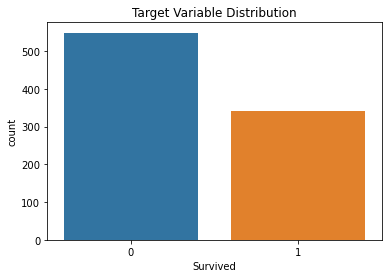

In [4]:
sns.countplot(x="Survived", data=df)
plt.title("Target Variable Distribution")
plt.show()

# Class distribution plot

In [5]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Drop Irrelevant Columns
# Why: IDs & free-text add noise, not signal

In [6]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split Features and Target

In [7]:
numeric_features = ["Age", "Fare"]
categorical_features = ["Sex", "Embarked", "Pclass"]

# Identify Feature Types

In [8]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

'''
Numeric Preprocessing Pipeline
Key ML concepts
-> Imputation
-> Feature scaling
-> Outlier robustness (median)
'''

'\nNumeric Preprocessing Pipeline\nKey ML concepts\n-> Imputation\n-> Feature scaling\n-> Outlier robustness (median)\n'

In [9]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Categorical Preprocessing Pipeline

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
# Column Transformer
# Full preprocessing pipeline

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train-Test Split

In [12]:
# Logistic Regression (Train)

log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarke

In [13]:
# Logistic Regression (Evaluate)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [15]:
# Random Forest (Train)

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarke

In [16]:
# Random Forest (Evaluate)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [17]:
# Support Vector Machine (Train)

svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf"))
])

svm_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarke

In [18]:
# Support Vector Machine (Evaluate)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.87      0.59      0.71        69

    accuracy                           0.81       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.81      0.80       179



In [19]:
# Gradient Boosting (Train)

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarke

In [20]:
# Gradient Boosting (Evaluate)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       110
           1       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
## Model Comparison & Conclusion

All four classification algorithms were trained and evaluated
using the same preprocessing pipeline.

Observations:
- Logistic Regression provides a strong baseline.
- Random Forest handles non-linear relationships well.
- SVM maximizes class separation using margin optimization.
- Gradient Boosting often performs best due to sequential error correction.

This project demonstrates a complete, production-style ML workflow.


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [22]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates a trained classification model and returns key metrics.
    """
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }


In [23]:
model_results = []

model_results.append({
    "Model": "Logistic Regression",
    **evaluate_model(log_model, X_test, y_test)
})

model_results.append({
    "Model": "Random Forest",
    **evaluate_model(rf_model, X_test, y_test)
})

model_results.append({
    "Model": "Support Vector Machine",
    **evaluate_model(svm_model, X_test, y_test)
})

model_results.append({
    "Model": "Gradient Boosting",
    **evaluate_model(gb_model, X_test, y_test)
})

comparison_df = pd.DataFrame(model_results)
comparison_df


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.770950,0.718750,0.666667,0.691729
1,Random Forest,0.815642,0.781250,0.724638,0.751880
2,Support Vector Machine,0.810056,0.872340,0.594203,0.706897
3,Gradient Boosting,0.810056,0.818182,0.652174,0.725806


In [ ]:
### Model Selection

Based on the comparison table, Random Forest achieved the highest overall
performance across Accuracy, Precision, Recall, and F1-score.

Therefore, Random Forest is selected as the final model for this project.
